Импортируем необходимые библиотеки математических функций, подсчета времени, построения графиков. 
Обозначим константы.

In [12]:
import copy
import math

import numpy as np
import matplotlib.pyplot as plt
from math import gamma
import time

# https://www.hindawi.com/journals/tswj/2014/497514/

# КОНСТАНТЫ
P = 150
PA = 0.25
BETA = 1.5
TMAX = 300
N = 2
Down = -5.12
High = 5.12

Время выполнения алгоритма:  1.969203819
Теоретичсекий минимум функции Бута: f(1, 3) = 0
Полученный минимум: f( [0.99997705 3.00000662] ) =  1.6374886435042883e-09


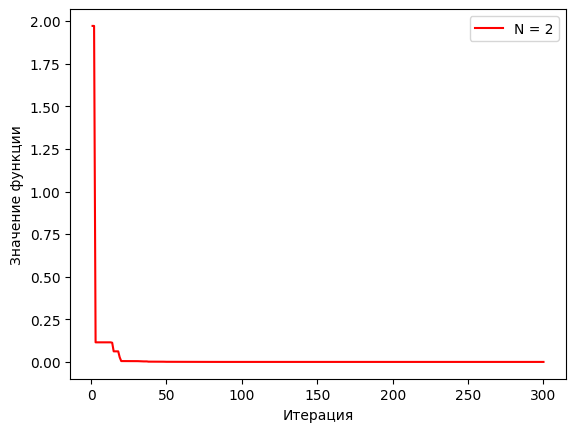

In [34]:
def fitness(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N<3:

        x, y = X[0][0], X[1][0]
        # f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2*y -7)**2 + (2*x + y -5)**2 #Бута работает

        return f
    else:
        for i in range(0, N-1):
            f += 100*(X[i+1][0] - X[i][0]**2)**2 + (X[i][0] - 1)**2 #розенброка
            #f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f


def Comparison(A, B):
    if fitness(A) < fitness(B):
        return A
    else:
        return B

def Create_by_Levy(X):

    gv = 1
    gu = ((gamma(1 + BETA)*math.sin(math.pi*BETA/2)) / gamma((1+BETA)/2)*BETA*2**((BETA-1)/2)) **(1/BETA)

    u = np.random.normal(0, gu**2, N) # нормальное распределение
    v = np.random.normal(0, gv**2, N)

    s = u / (abs(v)**(1/BETA))


    # находим лучшее в текущей популяции
    best = [X[0][0], X[1][0]]
    best = [X[0, :]]


    for i in range(P):
        best = Comparison(best, X[i, :])


    # best = X[0, :].copy()
    # for i in range(P):
    #     if i == 0:
    #         best = X[i, :].copy()
    #     else:
    #         best = Comparison(best, X[i, :])

    Xnew = copy.deepcopy(X)
    for i in range(P):
        Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        while not(all([x < 5.12 or x > -5.12 for x in Xnew[i, :]])):
            Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        X[i, :] = Comparison(Xnew[i, :], X[i, :])

    # print("aaaa", best)
    return X

def Replacement(X):
    Xnew = copy.deepcopy(X)
    for i in range(P):
        d1, d2 = np.random.randint(0, P-1, 2)
        for j in range(N):
            r = np.random.rand()
            if r < PA:
                Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
                # while (Xnew[i, j] > 5.12 or Xnew[i, j] < -5.12):
                #     Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
        X[i, :] = Comparison(X[i, :], Xnew[i, :])
    return X

def Find_best(X):
    # best = []
    best = copy.deepcopy(X[0, :])
    best = X[0, :].copy()
    for i in range(P):
        best = Comparison(best, X[i, :])
    return best

if __name__ == '__main__':

    X = []
    best = []
    f_best = []
    X = np.random.randn(P, N)  # создаем первую популяцию случайным образом
    # best = Find_best(X)
    start_time = time.perf_counter_ns()
    for i in range(TMAX):
        # print(X)
        X = Create_by_Levy(X) #Создаем полетом леви новую популяцию
        # print(X)
        X = Replacement(X) # заменяем с вероятность 0.25

        # best.append(Find_best(X))
        best.append(Find_best(X))
        f_best.append(fitness(Find_best(X)))
    time_elapsed = time.perf_counter_ns() - start_time
    print("Время выполнения алгоритма: ", time_elapsed /1_000_000_000)
    # print("Теоретичсекий минимум функции Химмельблау: f(3, 2) = 0; f(-2.8051, 3,.1313) = 0; f(-3.7793, -3.2831) = 0; f(3.58442, -1.8481) = 0")
    print("Теоретичсекий минимум функции Бута: f(1, 3) = 0")
    print("Полученный минимум: f(", Find_best(X) , ") = ", fitness(Find_best(X)))
    # print("BEST: ", f_best)

    x = np.arange(1, TMAX+1)
    plt.plot(x, f_best, color ="red", label="N = 2")
    plt.xlabel("Итерация")
    plt.ylabel("Значение функции")
    plt.legend()
    plt.show()

Функция Розенброка от 3х переменных

Время выполнения алгоритма:  4.02672347
Теоретический минимум функции Розенброка: f(1, 1, 1) = 0
Полученный минимум: f( [0.99939137 0.99712607 0.99256508] ) =  0.000570618831105531


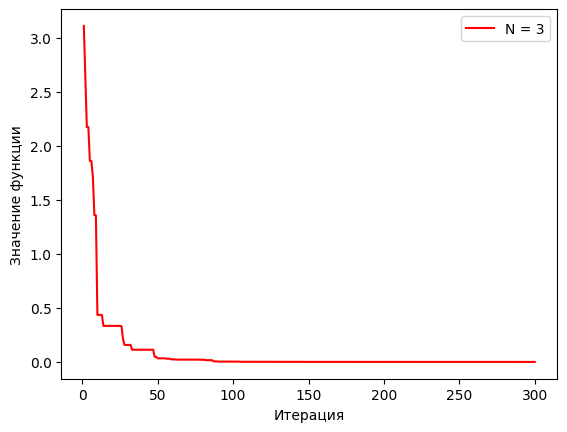

In [24]:
N = 3
def fitness(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N<3:

        x, y = X[0][0], X[1][0]
        #f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2*y -7)**2 + (2*x + y -5)**2 #Бута работает

        return f
    else:
        for i in range(0, N-1):
            f += 100*(X[i+1][0] - X[i][0]**2)**2 + (X[i][0] - 1)**2 #розенброка
            #f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f


def Comparison(A, B):
    if fitness(A) < fitness(B):
        return A
    else:
        return B

def Create_by_Levy(X):

    gv = 1
    gu = ((gamma(1 + BETA)*math.sin(math.pi*BETA/2)) / gamma((1+BETA)/2)*BETA*2**((BETA-1)/2)) **(1/BETA)

    u = np.random.normal(0, gu**2, N) # нормальное распределение
    v = np.random.normal(0, gv**2, N)

    s = u / (abs(v)**(1/BETA))


    # находим лучшее в текущей популяции
    best = [X[0][0], X[1][0]]
    best = [X[0, :]]


    for i in range(P):
        best = Comparison(best, X[i, :])


    # best = X[0, :].copy()
    # for i in range(P):
    #     if i == 0:
    #         best = X[i, :].copy()
    #     else:
    #         best = Comparison(best, X[i, :])

    Xnew = copy.deepcopy(X)
    for i in range(P):
        Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        while not(all([x < 5.12 or x > -5.12 for x in Xnew[i, :]])):
            Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        X[i, :] = Comparison(Xnew[i, :], X[i, :])

    # print("aaaa", best)
    return X

def Replacement(X):
    Xnew = copy.deepcopy(X)
    for i in range(P):
        d1, d2 = np.random.randint(0, P-1, 2)
        for j in range(N):
            r = np.random.rand()
            if r < PA:
                Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
                # while (Xnew[i, j] > 5.12 or Xnew[i, j] < -5.12):
                #     Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
        X[i, :] = Comparison(X[i, :], Xnew[i, :])
    return X

def Find_best(X):
    # best = []
    best = copy.deepcopy(X[0, :])
    best = X[0, :].copy()
    for i in range(P):
        best = Comparison(best, X[i, :])
    return best

if __name__ == '__main__':

    X = []
    best = []
    f_best = []
    X = np.random.randn(P, N)  # создаем первую популяцию случайным образом
    # best = Find_best(X)
    start_time = time.perf_counter_ns()
    for i in range(TMAX):
        # print(X)
        X = Create_by_Levy(X) #Создаем полетом леви новую популяцию
        # print(X)
        X = Replacement(X) # заменяем с вероятность 0.25

        best.append(Find_best(X))
        f_best.append(fitness(Find_best(X)))

    # print("BEST: ", f_best)
    time_elapsed = time.perf_counter_ns() - start_time
    # print("time: ", time_elapsed /1_000_000_000)
    # print("Best result: ", best.pop())
    print("Время выполнения алгоритма: ", time_elapsed /1_000_000_000)
    print("Теоретический минимум функции Розенброка: f(1, 1, 1) = 0")
    print("Полученный минимум: f(", Find_best(X) , ") = ", fitness(Find_best(X)))
    x = np.arange(1, TMAX+1)
    plt.plot(x, f_best, color ="red", label="N = 3")
    plt.xlabel("Итерация")
    plt.ylabel("Значение функции")
    plt.legend()
    plt.show()

Функция Розенброка от 10 переменных

time:  11.577131394
Время выполнения алгоритма:  11.577131394
Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1) = 0
Полученный минимум: f( [0.97536175 0.96488294 0.9518893  0.91929504 0.89693639 0.83849772
 0.76833696 0.61776625 0.36071683 0.12824034] ) =  1.6647354960394953


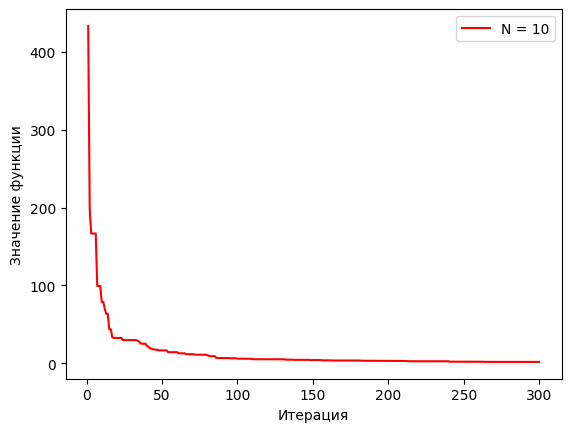

In [25]:
N = 10
def fitness(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N<3:

        x, y = X[0][0], X[1][0]
        #f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2*y -7)**2 + (2*x + y -5)**2 #Бута работает

        return f
    else:
        for i in range(0, N-1):
            f += 100*(X[i+1][0] - X[i][0]**2)**2 + (X[i][0] - 1)**2 #розенброка
            #f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f


def Comparison(A, B):
    if fitness(A) < fitness(B):
        return A
    else:
        return B

def Create_by_Levy(X):

    gv = 1
    gu = ((gamma(1 + BETA)*math.sin(math.pi*BETA/2)) / gamma((1+BETA)/2)*BETA*2**((BETA-1)/2)) **(1/BETA)

    u = np.random.normal(0, gu**2, N) # нормальное распределение
    v = np.random.normal(0, gv**2, N)

    s = u / (abs(v)**(1/BETA))


    # находим лучшее в текущей популяции
    best = [X[0][0], X[1][0]]
    best = [X[0, :]]


    for i in range(P):
        best = Comparison(best, X[i, :])


    # best = X[0, :].copy()
    # for i in range(P):
    #     if i == 0:
    #         best = X[i, :].copy()
    #     else:
    #         best = Comparison(best, X[i, :])

    Xnew = copy.deepcopy(X)
    for i in range(P):
        Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        while not(all([x < 5.12 or x > -5.12 for x in Xnew[i, :]])):
            Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        X[i, :] = Comparison(Xnew[i, :], X[i, :])

    # print("aaaa", best)
    return X

def Replacement(X):
    Xnew = copy.deepcopy(X)
    for i in range(P):
        d1, d2 = np.random.randint(0, P-1, 2)
        for j in range(N):
            r = np.random.rand()
            if r < PA:
                Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
                # while (Xnew[i, j] > 5.12 or Xnew[i, j] < -5.12):
                #     Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
        X[i, :] = Comparison(X[i, :], Xnew[i, :])
    return X

def Find_best(X):
    # best = []
    best = copy.deepcopy(X[0, :])
    best = X[0, :].copy()
    for i in range(P):
        best = Comparison(best, X[i, :])
    return best

if __name__ == '__main__':

    X = []
    best = []
    f_best = []
    X = np.random.randn(P, N)  # создаем первую популяцию случайным образом
    # best = Find_best(X)
    start_time = time.perf_counter_ns()
    for i in range(TMAX):
        # print(X)
        X = Create_by_Levy(X) #Создаем полетом леви новую популяцию
        # print(X)
        X = Replacement(X) # заменяем с вероятность 0.25

        best.append(Find_best(X))
        f_best.append(fitness(Find_best(X)))

    # print("BEST: ", f_best)
    time_elapsed = time.perf_counter_ns() - start_time
    # print("time: ", time_elapsed /1_000_000_000)
    # print("Best result: ", best.pop())
    print("Время выполнения алгоритма: ", time_elapsed /1_000_000_000)
    print("Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1) = 0")
    print("Полученный минимум: f(", Find_best(X) , ") = ", fitness(Find_best(X)))
    x = np.arange(1, TMAX+1)
    plt.plot(x, f_best, color ="red", label="N = 10")
    plt.xlabel("Итерация")
    plt.ylabel("Значение функции")
    plt.legend()
    plt.show()

Фуекция Розенброка от 50 переменных

Время выполнения алгоритма:  57.644839328
Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ) = 0
Полученный минимум: f( [-0.14214183  0.23674942  0.06228546  0.18797305 -0.19864176  0.04258617
 -0.01019947  0.16978986  0.00061685 -0.07074809 -0.09146843 -0.19351712
  0.00627339 -0.37578024 -0.25576287  0.05815296  0.34806866  0.20025533
  0.28111323 -0.07834348 -0.28653014  0.13206643 -0.10786727 -0.04107747
  0.24014353 -0.02210024 -0.32969215 -0.02643418  0.09353589  0.04627484
  0.02684589  0.13220855  0.02641688 -0.05508234  0.03478586 -0.09207698
  0.09014033  0.12986783  0.01193349  0.07675732  0.08431062  0.40277364
  0.37958852  0.44181176  0.26765336  0.22590704  0.34975591  0.43115642
  0.23943309  0.27210812] ) =  210.35807490402598


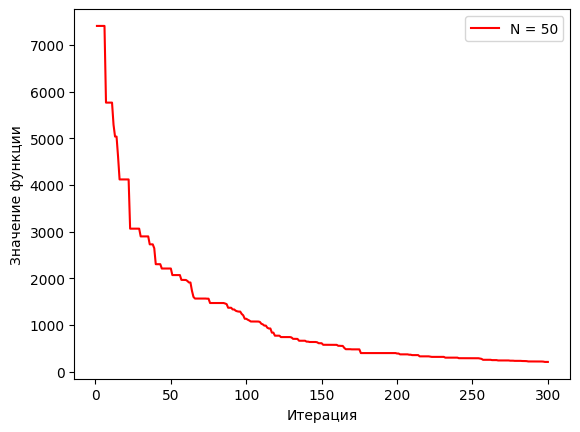

In [27]:
N = 50
def fitness(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N<3:

        x, y = X[0][0], X[1][0]
        #f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2*y -7)**2 + (2*x + y -5)**2 #Бута работает

        return f
    else:
        for i in range(0, N-1):
            f += 100*(X[i+1][0] - X[i][0]**2)**2 + (X[i][0] - 1)**2 #розенброка
            #f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f


def Comparison(A, B):
    if fitness(A) < fitness(B):
        return A
    else:
        return B

def Create_by_Levy(X):

    gv = 1
    gu = ((gamma(1 + BETA)*math.sin(math.pi*BETA/2)) / gamma((1+BETA)/2)*BETA*2**((BETA-1)/2)) **(1/BETA)

    u = np.random.normal(0, gu**2, N) # нормальное распределение
    v = np.random.normal(0, gv**2, N)

    s = u / (abs(v)**(1/BETA))


    # находим лучшее в текущей популяции
    best = [X[0][0], X[1][0]]
    best = [X[0, :]]


    for i in range(P):
        best = Comparison(best, X[i, :])


    # best = X[0, :].copy()
    # for i in range(P):
    #     if i == 0:
    #         best = X[i, :].copy()
    #     else:
    #         best = Comparison(best, X[i, :])

    Xnew = copy.deepcopy(X)
    for i in range(P):
        Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        while not(all([x < 5.12 or x > -5.12 for x in Xnew[i, :]])):
            Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        X[i, :] = Comparison(Xnew[i, :], X[i, :])

    # print("aaaa", best)
    return X

def Replacement(X):
    Xnew = copy.deepcopy(X)
    for i in range(P):
        d1, d2 = np.random.randint(0, P-1, 2)
        for j in range(N):
            r = np.random.rand()
            if r < PA:
                Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
                # while (Xnew[i, j] > 5.12 or Xnew[i, j] < -5.12):
                #     Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
        X[i, :] = Comparison(X[i, :], Xnew[i, :])
    return X

def Find_best(X):
    # best = []
    best = copy.deepcopy(X[0, :])
    best = X[0, :].copy()
    for i in range(P):
        best = Comparison(best, X[i, :])
    return best

if __name__ == '__main__':

    X = []
    best = []
    f_best = []
    X = np.random.randn(P, N)  # создаем первую популяцию случайным образом
    # best = Find_best(X)
    start_time = time.perf_counter_ns()
    for i in range(TMAX):
        # print(X)
        X = Create_by_Levy(X) #Создаем полетом леви новую популяцию
        # print(X)
        X = Replacement(X) # заменяем с вероятность 0.25

        best.append(Find_best(X))
        f_best.append(fitness(Find_best(X)))

    # print("BEST: ", f_best)
    time_elapsed = time.perf_counter_ns() - start_time
    # print("time: ", time_elapsed /1_000_000_000)
    # print("Best result: ", best.pop())
    print("Время выполнения алгоритма: ", time_elapsed /1_000_000_000)
    print("Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ) = 0")
    print("Полученный минимум: f(", Find_best(X) , ") = ", fitness(Find_best(X)))
    x = np.arange(1, TMAX+1)
    plt.plot(x, f_best, color ="red", label="N = 50")
    plt.xlabel("Итерация")
    plt.ylabel("Значение функции")
    plt.legend()
    plt.show()

Время выполнения алгоритма:  97.53898063
Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ) = 0
Полученный минимум: f( [ 0.92446369  0.68659547  0.09060864  0.27467292 -0.42097106  0.55260941
  0.81346257  0.39968768  0.12762065 -0.64445871  0.95277037  0.72864223
  0.58142409 -0.02440567 -0.31246105  0.09246117  0.24963752 -0.05740083
  0.22278458  0.34478228 -0.17289014 -0.58813138  0.39539534 -0.12061619
  0.12486275  0.12394688 -0.38889129 -0.35069724  0.06783554 -0.37973192
  0.01223876  0.234931    0.11933165  0.29767746  0.57259607  0.49533016
 -0.50143873  0.07363645 -0.37721106 -0.51494864  0.21477569 -0.31802219
  0.34673879  0.58509588  0.03775593 -0.23766677 -0.1679928  -0.35604266
  

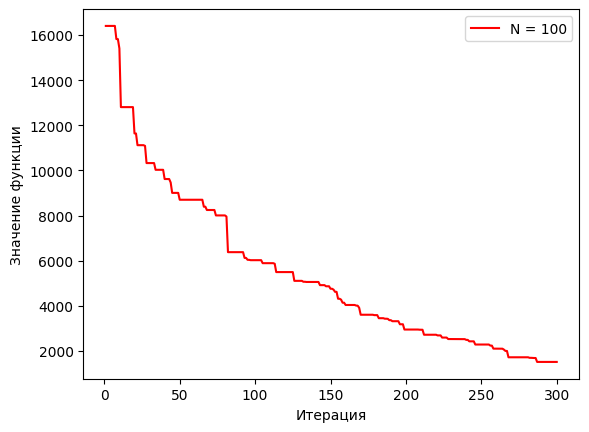

In [28]:
N = 100
def fitness(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N<3:

        x, y = X[0][0], X[1][0]
        #f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2*y -7)**2 + (2*x + y -5)**2 #Бута работает

        return f
    else:
        for i in range(0, N-1):
            f += 100*(X[i+1][0] - X[i][0]**2)**2 + (X[i][0] - 1)**2 #розенброка
            #f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f


def Comparison(A, B):
    if fitness(A) < fitness(B):
        return A
    else:
        return B

def Create_by_Levy(X):

    gv = 1
    gu = ((gamma(1 + BETA)*math.sin(math.pi*BETA/2)) / gamma((1+BETA)/2)*BETA*2**((BETA-1)/2)) **(1/BETA)

    u = np.random.normal(0, gu**2, N) # нормальное распределение
    v = np.random.normal(0, gv**2, N)

    s = u / (abs(v)**(1/BETA))


    # находим лучшее в текущей популяции
    best = [X[0][0], X[1][0]]
    best = [X[0, :]]


    for i in range(P):
        best = Comparison(best, X[i, :])


    # best = X[0, :].copy()
    # for i in range(P):
    #     if i == 0:
    #         best = X[i, :].copy()
    #     else:
    #         best = Comparison(best, X[i, :])

    Xnew = copy.deepcopy(X)
    for i in range(P):
        Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        while not(all([x < 5.12 or x > -5.12 for x in Xnew[i, :]])):
            Xnew[i, :] += 0.01 * s * (Xnew[i, :] - best)
        X[i, :] = Comparison(Xnew[i, :], X[i, :])

    # print("aaaa", best)
    return X

def Replacement(X):
    Xnew = copy.deepcopy(X)
    for i in range(P):
        d1, d2 = np.random.randint(0, P-1, 2)
        for j in range(N):
            r = np.random.rand()
            if r < PA:
                Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
                # while (Xnew[i, j] > 5.12 or Xnew[i, j] < -5.12):
                #     Xnew[i, j] += np.random.rand() * (X[d1, j] - X[d2, j])
        X[i, :] = Comparison(X[i, :], Xnew[i, :])
    return X

def Find_best(X):
    # best = []
    best = copy.deepcopy(X[0, :])
    best = X[0, :].copy()
    for i in range(P):
        best = Comparison(best, X[i, :])
    return best

if __name__ == '__main__':

    X = []
    best = []
    f_best = []
    X = np.random.randn(P, N)  # создаем первую популяцию случайным образом
    # best = Find_best(X)
    start_time = time.perf_counter_ns()
    for i in range(TMAX):
        # print(X)
        X = Create_by_Levy(X) #Создаем полетом леви новую популяцию
        # print(X)
        X = Replacement(X) # заменяем с вероятность 0.25

        best.append(Find_best(X))
        f_best.append(fitness(Find_best(X)))

    time_elapsed = time.perf_counter_ns() - start_time
    # print("time: ", time_elapsed /1_000_000_000)
    # print("Best result: ", best.pop())
    print("Время выполнения алгоритма: ", time_elapsed /1_000_000_000)
    print("Теоретический минимум функции Розенброка: f(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,",
          " 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ) = 0")
    print("Полученный минимум: f(", Find_best(X) , ") = ", fitness(Find_best(X)))
    x = np.arange(1, TMAX+1)
    plt.plot(x, f_best, color ="red", label="N = 100")
    plt.xlabel("Итерация")
    plt.ylabel("Значение функции")
    plt.legend()
    plt.show()

Сравнение времени выполнения алгоритма на Python и C.

Время выполянения алгоритма на языке С:
Для размерности 
2: 4.705 c;
3: 4.815 с;
10: 13.085 c;
50: 90.815 c;
100: 283,415 с.

Время выполянения алгоритма на языке Python:
Для размерности 
2: 5.496239651 c;
3: 11.626635034 с;
10: 21.156231088 c;
50: 74.093980181 c;
100: 128.013674567 с.



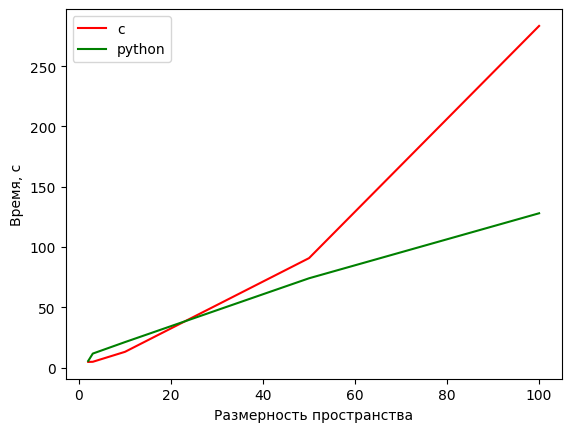

In [18]:
arr_c = [4.705, 4.815, 13.085, 90.815, 283.415]
arr_py = [5.4962, 11.62663, 21.1562, 74.0939, 128.01367]
arr_x = [2, 3, 10, 50, 100]

plt.plot(arr_x, arr_c, color ="red" , label="c")
plt.plot(arr_x, arr_py, color ="green", label="python")
plt.xlabel("Размерность пространства")
plt.ylabel("Время, с")
plt.legend()
plt.show()

Рассмотрим для сравнения генетический алгоритм из pypi

In [2]:
 pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=7c7a2709c9b75e217e11613fe42c7302ac4546d4d5fed1f626f2629c2de5a780
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 The best solution found:
 [1.2618879  1.59228234 2.53720433]

 Objective function:
 0.41972329581677953


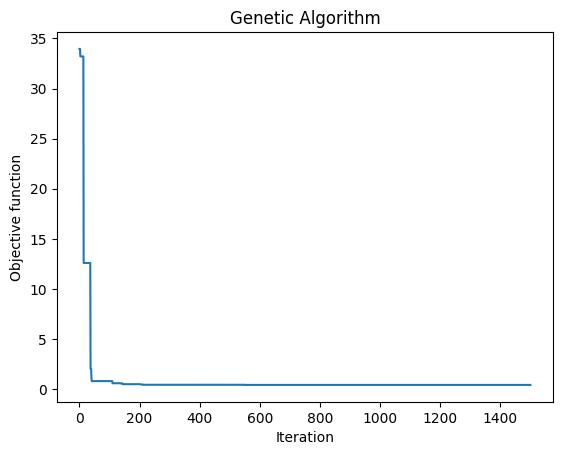

Время выполнения алгоритма:  36.077684862


In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import time
N = 3

def f(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N < 3:

        x, y = X[0][0], X[1][0]
        # f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2  # Бута работает

        return f
    else:
        for i in range(0, N - 1):
            f += 100 * (X[i + 1][0] - X[i][0] ** 2) ** 2 + (X[i][0] - 1) ** 2  # розенброка
            # f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f

if __name__ == '__main__':
    varbound=np.array([[0,10]]*3)
    start_time = time.perf_counter_ns()

    model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound)

    model.run()

    time_elapsed = time.perf_counter_ns() - start_time
    print("Время выполнения алгоритма: ", time_elapsed / 1_000_000_000)

 The best solution found:
 [1.00067341 2.99915822]

 Objective function:
 1.2754767782045982e-06


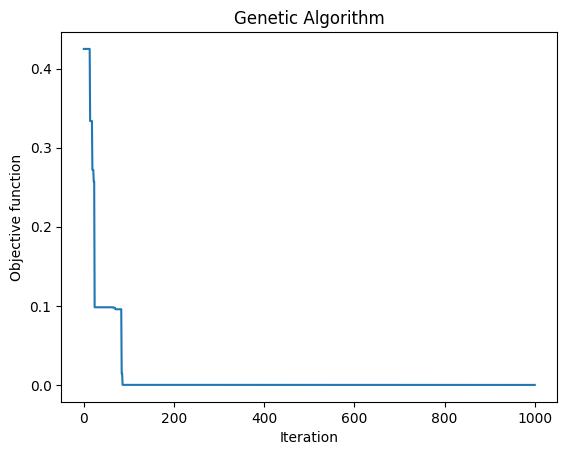

Время выполнения алгоритма:  18.227767873


In [6]:
N = 2

def f(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N < 3:

        x, y = X[0][0], X[1][0]
        # f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2  # Бута работает

        return f
    else:
        for i in range(0, N - 1):
            f += 100 * (X[i + 1][0] - X[i][0] ** 2) ** 2 + (X[i][0] - 1) ** 2  # розенброка
            # f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f

if __name__ == '__main__':
    varbound=np.array([[0,10]]*2)
    start_time = time.perf_counter_ns()

    model=ga(function=f,dimension=2,variable_type='real',variable_boundaries=varbound)

    model.run()

    time_elapsed = time.perf_counter_ns() - start_time
    print("Время выполнения алгоритма: ", time_elapsed / 1_000_000_000)

 The best solution found:
 [1.04817215 1.05065939 1.05517169 1.05952582 1.09556498 1.14669449
 1.327821   1.76218457 3.10083343 9.62163323]

 Objective function:
 6.284823627919432


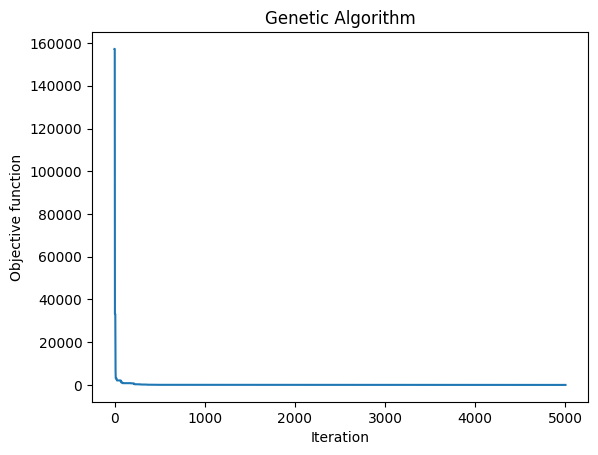

Время выполнения алгоритма:  123.918775303


In [8]:
N = 10

def f(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N < 3:

        x, y = X[0][0], X[1][0]
        # f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2  # Бута работает

        return f
    else:
        for i in range(0, N - 1):
            f += 100 * (X[i + 1][0] - X[i][0] ** 2) ** 2 + (X[i][0] - 1) ** 2  # розенброка
            # f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f

if __name__ == '__main__':
    varbound=np.array([[0,10]]*10)
    start_time = time.perf_counter_ns()

    model=ga(function=f,dimension=10,variable_type='real',variable_boundaries=varbound)

    model.run()

    time_elapsed = time.perf_counter_ns() - start_time
    print("Время выполнения алгоритма: ", time_elapsed / 1_000_000_000)

 The best solution found:
 [1.1442949  1.38072995 1.48908826 1.23099248 1.49549694 0.93057582
 0.21160359 0.1625757  0.18648141 0.28908293 0.50174036 0.4976852
 1.22198234 1.2762318  0.88776584 0.81394895 0.94649203 0.7661644
 0.62415311 1.16892988 0.42269894 0.57320985 0.19580206 0.65637801
 1.18243725 1.31488168 0.99517578 1.20701552 1.03001329 1.27570926
 0.97391828 1.42631049 1.33909456 0.92275809 0.98818937 0.97536926
 0.38099919 1.68472718 1.35896898 0.73259615 0.66713033 0.97610146
 0.90859724 1.1539834  1.23709968 1.06800846 0.84077238 1.62952187
 2.91936392 7.05748665]

 Objective function:
 2065.2233339576005


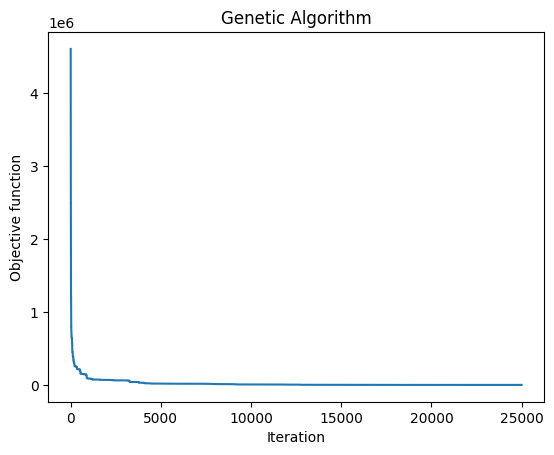

Время выполнения алгоритма:  1043.280301981


In [9]:
N = 50

def f(X):
    f = 0
    X = np.array(X).reshape(-1, 1)
    if N < 3:

        x, y = X[0][0], X[1][0]
        # f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 #химмельблау
        # f = 0.26*(x**2 + y**2) - 0.48*x*y
        f = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2  # Бута работает

        return f
    else:
        for i in range(0, N - 1):
            f += 100 * (X[i + 1][0] - X[i][0] ** 2) ** 2 + (X[i][0] - 1) ** 2  # розенброка
            # f += X[i][0] ** 2 #сферы
            # f += 10*N + X[i][0]**2 - 10*np.cos(2*np.pi*X[i][0]) #растригена
        return f

if __name__ == '__main__':
    varbound=np.array([[0,10]]*50)
    start_time = time.perf_counter_ns()

    model=ga(function=f,dimension=50,variable_type='real',variable_boundaries=varbound)

    model.run()

    time_elapsed = time.perf_counter_ns() - start_time
    print("Время выполнения алгоритма: ", time_elapsed / 1_000_000_000)

Сравнение времени выполнения собсвенного алгоритма и генетического алгоритма из pypi.

Время выполянения алгоритма pypi: Для размерности 2: 18.227 c; 3: 36.077 с; 10: 123.918 c; 50: 90.815 c; 100: 283,415 с.

Время выполянения собственного алгоритма: Для размерности 2: 5.496239651 c; 3: 11.626635034 с; 10: 21.156231088 c; 50: 74.093980181 c; 100: 128.013674567 с.

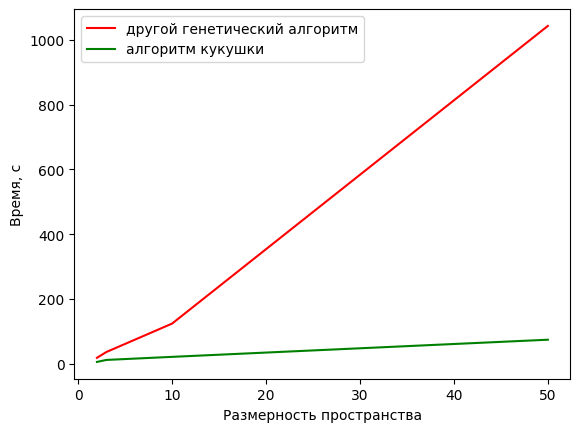

In [14]:
arr_pypi= [18.227, 36.077, 123.918, 1043.2803]
arr_py = [5.4962, 11.62663, 21.1562, 74.0939]
arr_x = [2, 3, 10, 50]

plt.plot(arr_x, arr_pypi, color ="red" , label="другой генетический алгоритм")
plt.plot(arr_x, arr_py, color ="green", label="алгоритм кукушки")
plt.xlabel("Размерность пространства")
plt.ylabel("Время, с")
plt.legend()
plt.show()